## 1. Carga e Importación de Librerías

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Carga inicial del conjunto de datos

In [75]:
df = pd.read_csv('./salario.csv')

Realizamos una primera visualización de los datos

In [76]:
df

,edad,trabajo,estudios,estado-civil,trabajo.1,posicion-familiar,etnia,sexo,ganancias_inversiones,perdidas_inversiones,horas-trabajo_semana,pais-origen,salario
0,39,State-gov,Bachelors,Never-married,Adm-clerical,No-en-familia,Blanco,Hombre,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Marido,Blanco,Hombre,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,No-en-familia,Blanco,Hombre,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Marido,Negro,Hombre,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Mujer,Negro,Mujer,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,59,?,10th,Widowed,?,Soltero-a,Blanco,Mujer,0,0,40,United-States,<=50K
27994,42,Self-emp-not-inc,Masters,Married-civ-spouse,Exec-managerial,Marido,Blanco,Hombre,0,0,50,United-States,>50K
27995,62,Private,HS-grad,Widowed,Sales,No-en-familia,Blanco,Mujer,0,0,43,United-States,<=50K
27996,54,Private,HS-grad,Never-married,Sales,No-en-familia,Blanco,Hombre,0,0,40,United-States,<=50K


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27998 entries, 0 to 27997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   edad                   27998 non-null  int64 
 1   trabajo                27998 non-null  object
 2   estudios               27998 non-null  object
 3   estado-civil           27998 non-null  object
 4   trabajo.1              27998 non-null  object
 5   posicion-familiar      27998 non-null  object
 6   etnia                  27998 non-null  object
 7   sexo                   27998 non-null  object
 8   ganancias_inversiones  27998 non-null  int64 
 9   perdidas_inversiones   27998 non-null  int64 
 10  horas-trabajo_semana   27998 non-null  int64 
 11  pais-origen            27998 non-null  object
 12  salario                27998 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.8+ MB


## 2. Tratamiento de Valores Nulos

Aunque `.info()` no mostró nulos, una inspección de los valores únicos revela la presencia de `'?'` como un marcador de datos faltantes.

In [78]:
for i in df.columns:
    print(df[i].value_counts().sort_values(ascending=False))

edad
31    764
23    763
36    762
35    756
34    754
     ... 
84     10
83      6
88      3
85      2
86      1
Name: count, Length: 72, dtype: int64
trabajo
Private             19483
Self-emp-not-inc     2211
Local-gov            1810
?                    1568
State-gov            1119
Self-emp-inc          961
Federal-gov           830
Without-pay            11
Never-worked            5
Name: count, dtype: int64
estudios
HS-grad         9033
Some-college    6250
Bachelors       4642
Masters         1477
Assoc-voc       1184
11th            1023
Assoc-acdm       905
10th             811
7th-8th          563
Prof-school      488
9th              438
12th             369
Doctorate        357
5th-6th          282
1st-4th          131
Preschool         45
Name: count, dtype: int64
estado-civil
Married-civ-spouse       12834
Never-married             9172
Divorced                  3837
Separated                  899
Widowed                    869
Married-spouse-absent      366
Married-A

Identificamos que las columnas 'trabajo', 'trabajo.1' y 'pais-origen' contienen '?' como valor. Para que sean reconocidos como nulos, volvemos a cargar el dataset especificando `na_values=['?']`. Esto nos permitirá tratarlos adecuadamente en los siguientes pasos.

In [79]:
df = pd.read_csv('./salario.csv', na_values=['?'], skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27998 entries, 0 to 27997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   edad                   27998 non-null  int64 
 1   trabajo                26430 non-null  object
 2   estudios               27998 non-null  object
 3   estado-civil           27998 non-null  object
 4   trabajo.1              26425 non-null  object
 5   posicion-familiar      27998 non-null  object
 6   etnia                  27998 non-null  object
 7   sexo                   27998 non-null  object
 8   ganancias_inversiones  27998 non-null  int64 
 9   perdidas_inversiones   27998 non-null  int64 
 10  horas-trabajo_semana   27998 non-null  int64 
 11  pais-origen            27503 non-null  object
 12  salario                27998 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.8+ MB


## 3. División de Datos (Train/Validation)

Realizamos la división antes de cualquier imputación o escalado. Esto es importante de cara a evitar la fuga de datos (data leakage).  

Si imputáramos o escaláramos usando información del conjunto de datos completo (ej. la media o moda global), el modelo tendría "conocimiento" previo sobre el conjunto de validación, inflando artificialmente sus métricas de rendimiento.

Se eligió una división 80/20 ya que si bien 70/30 es lo común, con un dataset de ~28,000 muestras, un conjunto de validación del 20% (5,600 muestras) es estadísticamente robusto para obtener una métrica de rendimiento fiable. Esta proporción nos permite maximizar la cantidad de datos para el entrenamiento y así construir un modelo más sólido, sin sacrificar la confianza en su evaluación.

Usamos `stratify=y` para asegurar que la proporción de clases del target (que está desbalanceado, ~76%/24%) se mantenga idéntica en ambos conjuntos.

Adicionalmente, mapeamos la variable objetivo 'salario' a valores numéricos (0 para '<=50K' y 1 para '>50K') para el modelado.

In [80]:
mapa_salario = {
    '<=50K': 0,
    '>50K': 1
}

df['salario'] = df['salario'].map(mapa_salario)


target_col = 'salario'
y = df[target_col]
X = df.drop(target_col, axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

Verificamos las dimensiones y la estratificación. La proporción de clases es ~76%/24% en ambos conjuntos, confirmando que la estratificación fue exitosa.

In [81]:
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print("\nProporción en y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporción en y_val:")
print(y_val.value_counts(normalize=True))

Tamaño de X_train: (22398, 12)
Tamaño de X_val: (5600, 12)

Proporción en y_train:
salario
0    0.760425
1    0.239575
Name: proportion, dtype: float64

Proporción en y_val:
salario
0    0.760357
1    0.239643
Name: proportion, dtype: float64


## 4. Imputación de Valores Nulos

Las columnas 'trabajo', 'trabajo.1', y 'pais-origen' ahora tienen valores nulos. Decidimos imputarlos en lugar de eliminar filas, ya que la cantidad de datos faltantes es considerable (+1200 nulos en 'trabajo' en el set de entrenamiento) y eliminar esas filas resultaría en una pérdida significativa de información.

In [82]:
print(X_train.isnull().sum())

edad                        0
trabajo                  1249
estudios                    0
estado-civil                0
trabajo.1                1253
posicion-familiar           0
etnia                       0
sexo                        0
ganancias_inversiones       0
perdidas_inversiones        0
horas-trabajo_semana        0
pais-origen               396
dtype: int64


Calculamos la moda para cada una de las tres columnas usando únicamente `X_train`.

Rellenamos los valores nulos tanto en `X_train` como en `X_val` usando la moda calculada de `X_train`.

Usamos la moda porque estas son variables categóricas (tipo 'object'), y la moda es el estadístico de tendencia central apropiado para ellas. 

Es fundamental usar solo `X_train` para calcular la moda para prevenir de nuevo la fuga de datos.

In [83]:
columnas_con_nulos = ['trabajo', 'trabajo.1', 'pais-origen']

for col in columnas_con_nulos:
    moda = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(moda)
    X_val[col] = X_val[col].fillna(moda)

Verificación post-imputación. Confirmamos que no quedan nulos en `X_train`.

In [84]:
print("Nulos restantes en X_train:")
print(X_train.isnull().sum())

Nulos restantes en X_train:
edad                     0
trabajo                  0
estudios                 0
estado-civil             0
trabajo.1                0
posicion-familiar        0
etnia                    0
sexo                     0
ganancias_inversiones    0
perdidas_inversiones     0
horas-trabajo_semana     0
pais-origen              0
dtype: int64


## 5. Preprocesado de Variables

En este punto, definimos dos estrategias de preprocesado (pipelines) que se compararán para determinar el mejor enfoque.

### Estrategia Categórica 
Para maximizar la precisión, aplicamos una codificación específica para cada tipo de variable categórica:

* **Ordinales ('estudios'):** Esta variable tiene una jerarquía clara (ej. `HS-grad` < `Bachelors` < `Doctorate`). Usamos `OrdinalEncoder` con un orden explícito (`education_order`) para preservar esta información ordinal como una única columna numérica (0 a 15).
* **Binarias ('sexo'):** Al tener solo dos valores, usamos `OrdinalEncoder` para una codificación eficiente en una sola columna (0 o 1).
* **Nominales (resto):** Columnas como 'trabajo' o 'estado-civil' no tienen un orden lógico. Usamos `OneHotEncoder` para crear columnas *dummy*.

---
### Estrategia Numérica
Observamos que `ganancias_inversiones` y `perdidas_inversiones` tienen muchos ceros y valores atípicos extremos (outliers). Proponemos dos maneras diferentes de tratar las columnas numéricas y analizaremos cuál obtiene mejores resultados:

* **Pipeline V1:** Usamos `RobustScaler`.
    * Esta es la estrategia "segura". `RobustScaler` usa la mediana y los rangos intercuartílicos, por lo que es robusto a los outliers. El valor `99999` no "contamina" el escalado, permitiendo que el modelo lo vea como un valor extremo (ya sea un error o un dato valioso). Se combina con `SMOTE` para el desbalanceo.

* **Pipeline V2:** Usamos `StandardScaler`.
    * Sabemos que `StandardScaler` es sensible a los outliers. Al usar la media y la desviación estándar, el valor `99999` distorsionará la escala y "aplastará" al resto de los datos. No tratamos los outliers a propósito para crear un escenario de contraste. La hipótesis es probar si un modelo (`LogisticRegression` con `class_weight='balanced'`) es capaz de gestionar estas features mal escaladas y aun así obtener un buen rendimiento, evitando el posible ruido o sobreajuste que podría introducir `SMOTE`.

In [85]:
numeric_features = ['edad', 'ganancias_inversiones', 'perdidas_inversiones', 'horas-trabajo_semana']
ordinal_features = ['estudios']
binary_features = ['sexo']
nominal_features = ['trabajo', 'estado-civil', 'trabajo.1', 'posicion-familiar', 'etnia', 'pais-origen']
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', 
    '10th', '11th', '12th', 'HS-grad', 'Some-college', 
    'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 
    'Prof-school', 'Doctorate'
]

numeric_transformer = RobustScaler()
numeric_transformer_v2 = StandardScaler()
ordinal_transformer = OrdinalEncoder(
    categories=[education_order],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
binary_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough'
)

preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_v2, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

X_train_preprocessed_v2 = preprocessor_v2.fit_transform(X_train)
X_val_preprocessed_v2 = preprocessor_v2.transform(X_val)

print(f"Dimensiones (originales): {X_train.shape}")
print(f"Nuevas dimensiones (preprocesadas): {X_train_preprocessed.shape}")

Dimensiones (originales): (22398, 12)
Nuevas dimensiones (preprocesadas): (22398, 87)


## 6. Manejo de Desbalanceo de Clases

Como vimos en el split, la clase '1' (>50K) representa solo el 24% de los datos. Esto es un desbalanceo significativo que puede sesgar al modelo a predecir siempre la clase mayoritaria ('0').

Definimos dos estrategias para combatir esto:

* **Estrategia V1 (Oversampling):** Usamos `SMOTE` (Synthetic Minority Over-sampling Technique) después de aplicar `preprocessor_v1` a los datos de entrenamiento.  
Elegimos SMOTE sobre otras técnicas por ser más avanzado:  
    * Undersampling (borrar datos de la clase '0') perdería información valiosa.  
    * Random Oversampling (copiar datos de la clase '1') puede llevar a un sobreajuste severo, ya que el modelo simplemente memoriza las mismas muestras.  
    * `SMOTE` crea nuevas muestras sintéticas de la clase minoritaria, balanceando el dataset sin perder información y reduciendo el riesgo de sobreajuste.  
    SMOTE solo se aplica a `X_train`, nunca a `X_val`.

* **Estrategia V2 (Ponderación):** No aplicamos SMOTE. En su lugar, entrenaremos el modelo juez (`LogisticRegression`) y el resto de algoritmos con el parámetro interno `class_weight='balanced'`. Este método ajusta las penalizaciones del modelo, dando más importancia a los errores cometidos en la clase minoritaria, logrando un efecto similar al balanceo sin alterar los datos.

In [86]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_preprocessed, 
    y_train
)


print(f"Dimensiones de X_train (antes de SMOTE): {X_train_preprocessed.shape}")
print(f"Dimensiones de X_train (después de SMOTE): {X_train_balanced.shape}")

print("\nBalance de clases (antes de SMOTE):")
print(y_train.value_counts())

print("\nBalance de clases (después de SMOTE):")
print(y_train_balanced.value_counts())

Dimensiones de X_train (antes de SMOTE): (22398, 87)
Dimensiones de X_train (después de SMOTE): (34064, 87)

Balance de clases (antes de SMOTE):
salario
0    17032
1     5366
Name: count, dtype: int64

Balance de clases (después de SMOTE):
salario
0    17032
1    17032
Name: count, dtype: int64


## 7. Selección de Características

Pasemos con la selección de características:


Después del preprocesado (V1 y V2), el número de características ha aumentado a 87 (debido al OneHotEncoding). Un número tan alto puede incluir ruido y aumentar el coste computacional. Aplicamos tres familias de métodos de selección de características para reducir la dimensionalidad a `k=30`, un valor heurístico elegido para forzar una reducción significativa y comparar los métodos.

**Nota:** Este proceso se aplica de forma independiente a ambos pipelines (V1 con SMOTE y V2 sin SMOTE).

### A. Métodos de Filtro (f_classif)

Elegimos `f_classif` (ANOVA F-score) porque es ideal para nuestro problema: una clasificación binaria (salario) con características de entrada numéricas (resultado de nuestro preprocesado). Este método evalúa cada característica de forma independiente midiendo la diferencia de medias entre las dos clases, siendo más apropiado que Chi-cuadrado (para datos categóricos) o la correlación de Pearson (que solo mide relaciones lineales).

In [87]:
k_best_selector = SelectKBest(score_func=f_classif, k=30)
k_best_selector.fit(X_train_balanced, y_train_balanced)

feature_scores_filter = k_best_selector.scores_
features_elegidas_filter = k_best_selector.get_support()

print(f"Índices de las características elegidas: {np.where(features_elegidas_filter)}")

Índices de las características elegidas: (array([ 0,  1,  2,  3,  4,  5,  9, 10, 14, 16, 18, 19, 20, 21, 24, 25, 26,
       27, 28, 30, 35, 36, 37, 38, 39, 40, 43, 44, 71, 84]),)


In [88]:
k_best_selector_v2 = SelectKBest(score_func=f_classif, k=30)
k_best_selector_v2.fit(X_train_preprocessed_v2, y_train)
features_elegidas_filter_v2 = k_best_selector_v2.get_support()

print(f"Índices de las características elegidas: {np.where(features_elegidas_filter_v2)}")

Índices de las características elegidas: (array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 14, 16, 18, 19, 20, 21, 24, 25,
       26, 27, 28, 30, 35, 36, 37, 38, 39, 40, 43, 44, 71]),)


### B. Métodos Wrapper (RFE)

Los métodos Wrapper evalúan el rendimiento de un modelo usando distintos subconjuntos de características.

Elegimos RFE (Recursive Feature Elimination) sobre otras alternativas Wrapper (como *Forward Selection* o *Backward Elimination* simple) por su equilibrio entre eficacia y eficiencia. Mientras que las selecciones "greedy" (hacia adelante o atrás) pueden ser computacionalmente prohibitivas (requieren re-entrenar el modelo para cada adición/eliminación), RFE ofrece un enfoque más inteligente.

RFE es una forma avanzada de eliminación hacia atrás que, en lugar de probar todas las combinaciones, utiliza la importancia de las características para eliminar recursivamente las menos influyentes. Esto lo hace más rápido que una búsqueda exhaustiva y más robusto que una eliminación simple.

Se utilizó `LogisticRegression` como el estimador dentro de RFE por dos razones:
1.  Velocidad: Es un modelo muy rápido de entrenar.
2.  Importancia: Proporciona el atributo `.coef_` que RFE utiliza para clasificar y eliminar las características.

In [89]:
estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
rfe_selector = RFE(estimator=estimator, n_features_to_select=30, step=1)

rfe_selector.fit(X_train_balanced, y_train_balanced)

features_elegidas_wrapper = rfe_selector.support_

print(f"Índices de las características elegidas: {np.where(rfe_selector.ranking_ == 1)}")

Índices de las características elegidas: (array([ 5, 13, 16, 24, 25, 26, 28, 29, 30, 33, 35, 37, 39, 45, 48, 49, 51,
       52, 53, 58, 70, 71, 72, 73, 74, 78, 80, 83, 85, 86]),)


In [90]:
estimator_v2 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
rfe_selector_v2 = RFE(estimator=estimator_v2, n_features_to_select=30, step=1)

rfe_selector_v2.fit(X_train_preprocessed_v2, y_train)

features_elegidas_wrapper_v2 = rfe_selector_v2.support_

print(f"Índices de features elegidas: {np.where(rfe_selector_v2.ranking_ == 1)}")

Índices de features elegidas: (array([ 1,  5,  6, 13, 15, 16, 24, 25, 26, 28, 29, 30, 33, 35, 37, 39, 41,
       45, 49, 51, 52, 55, 58, 71, 72, 74, 75, 80, 85, 86]),)


### C. Métodos Embebidos (L1/LASSO)

Usamos `SelectFromModel` con `LogisticRegression` y penalización `penalty='l1'` (LASSO). Los métodos embebidos integran la selección de características en el propio proceso de entrenamiento del modelo. LASSO es ideal para esto, ya que su término de regularización L1 fuerza a que los coeficientes de las características menos importantes se reduzcan a exactamente cero, realizando una selección automática. Esto contrasta con Ridge (L2), que solo reduce los pesos sin eliminarlos.

In [91]:
lasso_model = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    C=0.1, 
    random_state=42,
    max_iter=1000
)

embedded_selector = SelectFromModel(
    lasso_model, 
    max_features=30,
    threshold=-np.inf
) 

embedded_selector.fit(X_train_balanced, y_train_balanced)
features_elegidas_embedded = embedded_selector.get_support()

print(f"Índices de las características elegidas: {np.where(features_elegidas_embedded)}")

Índices de las características elegidas: (array([ 0,  5,  7, 11, 12, 14, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28,
       29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 45, 71, 75]),)


In [92]:
lasso_model_v2 = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    C=0.1,
    random_state=42,
    max_iter=1000
)

embedded_selector_v2 = SelectFromModel(
    lasso_model_v2, 
    max_features=30,
    threshold=-np.inf
) 
embedded_selector_v2.fit(X_train_preprocessed_v2, y_train)

features_elegidas_embedded_v2 = embedded_selector_v2.get_support()

print(f"Índices de features elegidas: {np.where(features_elegidas_embedded_v2)}")

Índices de features elegidas: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 16, 18, 24, 25, 26,
       27, 28, 30, 31, 32, 33, 35, 37, 39, 40, 43, 45, 71]),)


### Evaluación de Métodos de Selección

Comparamos el rendimiento (F1-score) de cada conjunto de características (Filtro, Wrapper, Embebido) y sus consensos, usando un modelo "juez" (`LogisticRegression`).

* El **Baseline** usa las 87 características.
* El **Consenso 'Al menos 2'** selecciona características que fueron elegidas por al menos 2 de los 3 métodos.
* El **Consenso 'Todos 3'** selecciona las características comunes a los 3 métodos.

Esta evaluación se hace por separado para V1 (con SMOTE) y V2 (con `class_weight='balanced'`).

In [93]:
model_juez = LogisticRegression(solver='liblinear', random_state=32)

features_consenso_2 = (features_elegidas_filter & features_elegidas_wrapper) | \
                      (features_elegidas_filter & features_elegidas_embedded) | \
                      (features_elegidas_wrapper & features_elegidas_embedded) # Que estén en al menos 2 de los 3 tipos
                      
features_consenso_3 = (features_elegidas_filter & features_elegidas_wrapper & features_elegidas_embedded) # Que estén en los 3

num_consenso_2 = np.sum(features_consenso_2)
num_consenso_3 = np.sum(features_consenso_3)


# Baseline (Todas las 87)
model_juez.fit(X_train_balanced, y_train_balanced)
preds_all = model_juez.predict(X_val_preprocessed)
f1_all = f1_score(y_val, preds_all)
print(f"Baseline (87 features):      {f1_all:.4f}")

# Filtro
X_train_fil = X_train_balanced[:, features_elegidas_filter]
X_val_fil = X_val_preprocessed[:, features_elegidas_filter]
model_juez.fit(X_train_fil, y_train_balanced)
preds_fil = model_juez.predict(X_val_fil)
f1_filtro = f1_score(y_val, preds_fil)
print(f"Método 'Filtro' (30 features):   {f1_filtro:.4f}")

# Wrapper
X_train_wra = X_train_balanced[:, features_elegidas_wrapper]
X_val_wra = X_val_preprocessed[:, features_elegidas_wrapper]
model_juez.fit(X_train_wra, y_train_balanced)
preds_wra = model_juez.predict(X_val_wra)
f1_wrapper = f1_score(y_val, preds_wra)
print(f"Método 'Wrapper' (30 features):  {f1_wrapper:.4f}")

# Embebido
X_train_emb = X_train_balanced[:, features_elegidas_embedded]
X_val_emb = X_val_preprocessed[:, features_elegidas_embedded]
model_juez.fit(X_train_emb, y_train_balanced)
preds_emb = model_juez.predict(X_val_emb)
f1_embebido = f1_score(y_val, preds_emb)
print(f"Método 'Embebido' (30 features): {f1_embebido:.4f}")

# En al menos 2
X_train_c2 = X_train_balanced[:, features_consenso_2]
X_val_c2 = X_val_preprocessed[:, features_consenso_2]
model_juez.fit(X_train_c2, y_train_balanced)
preds_c2 = model_juez.predict(X_val_c2)
f1_c2 = f1_score(y_val, preds_c2)
print(f"Consenso 'Al menos 2' ({num_consenso_2} features): {f1_c2:.4f}")

# En los 3
X_train_c3 = X_train_balanced[:, features_consenso_3]
X_val_c3 = X_val_preprocessed[:, features_consenso_3]
model_juez.fit(X_train_c3, y_train_balanced)
preds_c3 = model_juez.predict(X_val_c3)
f1_c3 = f1_score(y_val, preds_c3)
print(f"Consenso 'Todos 3' ({num_consenso_3} features):   {f1_c3:.4f}")

Baseline (87 features):      0.6828
Método 'Filtro' (30 features):   0.6698
Método 'Wrapper' (30 features):  0.6265
Método 'Embebido' (30 features): 0.6310
Consenso 'Al menos 2' (23 features): 0.6312
Consenso 'Todos 3' (10 features):   0.5731


In [94]:
model_juez_v2 = LogisticRegression(
    solver='liblinear', 
    random_state=32,
    class_weight='balanced'
)

features_consenso_2_v2 = (features_elegidas_filter_v2 & features_elegidas_wrapper_v2) | \
                       (features_elegidas_filter_v2 & features_elegidas_embedded_v2) | \
                       (features_elegidas_wrapper_v2 & features_elegidas_embedded_v2)
                      
features_consenso_3_v2 = (features_elegidas_filter_v2 & features_elegidas_wrapper_v2 & features_elegidas_embedded_v2)

num_consenso_2_v2 = np.sum(features_consenso_2_v2)
num_consenso_3_v2 = np.sum(features_consenso_3_v2)


model_juez_v2.fit(X_train_preprocessed_v2, y_train) 
preds_all_v2 = model_juez_v2.predict(X_val_preprocessed_v2)
f1_all_v2 = f1_score(y_val, preds_all_v2)
print(f"Baseline V2 (87 features):        {f1_all_v2:.4f}")

X_train_fil_v2 = X_train_preprocessed_v2[:, features_elegidas_filter_v2]
X_val_fil_v2 = X_val_preprocessed_v2[:, features_elegidas_filter_v2]
model_juez_v2.fit(X_train_fil_v2, y_train) # <-- Sin SMOTE
preds_fil_v2 = model_juez_v2.predict(X_val_fil_v2)
f1_filtro_v2 = f1_score(y_val, preds_fil_v2)
print(f"Método 'Filtro' V2 (30 features):   {f1_filtro_v2:.4f}")

X_train_wra_v2 = X_train_preprocessed_v2[:, features_elegidas_wrapper_v2]
X_val_wra_v2 = X_val_preprocessed_v2[:, features_elegidas_wrapper_v2]
model_juez_v2.fit(X_train_wra_v2, y_train) # <-- Sin SMOTE
preds_wra_v2 = model_juez_v2.predict(X_val_wra_v2)
f1_wrapper_v2 = f1_score(y_val, preds_wra_v2)
print(f"Método 'Wrapper' V2 (30 features):  {f1_wrapper_v2:.4f}")

X_train_emb_v2 = X_train_preprocessed_v2[:, features_elegidas_embedded_v2]
X_val_emb_v2 = X_val_preprocessed_v2[:, features_elegidas_embedded_v2]
model_juez_v2.fit(X_train_emb_v2, y_train) # <-- Sin SMOTE
preds_emb_v2 = model_juez_v2.predict(X_val_emb_v2)
f1_embebido_v2 = f1_score(y_val, preds_emb_v2)
print(f"Método 'Embebido' V2 (30 features): {f1_embebido_v2:.4f}")

X_train_c2_v2 = X_train_preprocessed_v2[:, features_consenso_2_v2]
X_val_c2_v2 = X_val_preprocessed_v2[:, features_consenso_2_v2]
model_juez_v2.fit(X_train_c2_v2, y_train) # <-- Sin SMOTE
preds_c2_v2 = model_juez_v2.predict(X_val_c2_v2)
f1_c2_v2 = f1_score(y_val, preds_c2_v2)
print(f"Consenso 'Al menos 2' V2 ({num_consenso_2_v2} features): {f1_c2_v2:.4f}")

X_train_c3_v2 = X_train_preprocessed_v2[:, features_consenso_3_v2]
X_val_c3_v2 = X_val_preprocessed_v2[:, features_consenso_3_v2]
model_juez_v2.fit(X_train_c3_v2, y_train)
preds_c3_v2 = model_juez_v2.predict(X_val_c3_v2)
f1_c3_v2 = f1_score(y_val, preds_c3_v2)
print(f"Consenso 'Todos 3' V2 ({num_consenso_3_v2} features):   {f1_c3_v2:.4f}")

Baseline V2 (87 features):        0.6827
Método 'Filtro' V2 (30 features):   0.6795
Método 'Wrapper' V2 (30 features):  0.6458
Método 'Embebido' V2 (30 features): 0.6841
Consenso 'Al menos 2' V2 (24 features): 0.6798
Consenso 'Todos 3' V2 (13 features):   0.6472


### Decisión Final: Pipeline V2 (Ponderado)

Al comparar los resultados de la evaluación, el Pipeline V2 (StandardScaler + Ponderación de Clases) demostró un rendimiento superior y más consistente que el Pipeline V1 (RobustScaler + SMOTE).

El mejor F1-score fue obtenido por el método 'Embebido' V2 (0.6841), que superó al baseline (0.6827). Sin embargo, para la exportación final, seleccionaremos el conjunto de 24 características del 'Consenso Al menos 2' V2 (F1=0.6798).

La diferencia de F1-score entre 'Embebido V2' y 'Consenso V2' es mínima (0.0043). Se prioriza el conjunto de 'Consenso' por ser **más robusto**, ya que representa las características en las que al menos dos de los tres métodos de selección coincidieron. Esto reduce el riesgo de incluir características menos fiables y crea un dataset más estable y generalizable para la comparativa final de modelos.

Por lo tanto, el Pipeline V1 (con SMOTE) se descarta, y se procede a exportar únicamente el conjunto de datos del Pipeline V2.

## 8. Exportación de Datasets Preprocesados

Exportamos el dataset V2 (X_train y X_val preprocesados con StandardScaler y seleccionados por 'Consenso V2') a un archivo `.csv.zip`. Este será el único dataset utilizado para el modelado.

In [95]:
X_train_final_v2 = X_train_preprocessed_v2[:, features_consenso_2_v2]
X_val_final_v2 = X_val_preprocessed_v2[:, features_consenso_2_v2]

feature_names_v2 = preprocessor_v2.get_feature_names_out()
final_feature_names_v2 = feature_names_v2[features_consenso_2_v2]

df_train_v2 = pd.DataFrame(
    X_train_final_v2.toarray(), 
    columns=final_feature_names_v2
)
df_train_v2['salario'] = y_train.reset_index(drop=True).values

df_val_v2 = pd.DataFrame(X_val_final_v2.toarray(), columns=final_feature_names_v2)
df_val_v2['salario'] = y_val.reset_index(drop=True).values

df_processed_final_v2 = pd.concat([df_train_v2, df_val_v2], axis=0)
compression_opts_v2 = dict(method='zip', archive_name='processed_dataset_v2.csv')

df_processed_final_v2.to_csv(
    'processed_dataset_v2.csv.zip', 
    index=False, 
    compression=compression_opts_v2
)

## 10. Visualizaciones

Generamos los gráficos de Importancia de Características y las Matrices de Confusión para ambos pipelines (V1 y V2).

Esta comparativa visual es fundamental para la memoria, ya que nos permite:
1.  Justificar la Decisión: Demostrar visualmente por qué el Pipeline V2 (ponderado) fue superior al V1 (SMOTE).
2.  Analizar Errores: Comparar cómo cada estrategia maneja los Falsos Positivos y Falsos Negativos (lo cual se ve en la matriz de confusión).
3.  Interpretar Modelos: Ver qué características consideró más importantes cada pipeline.

In [96]:
labels = ['Predice <50K', 'Predice >50K']
true_labels = ['Real <50K', 'Real >50K']

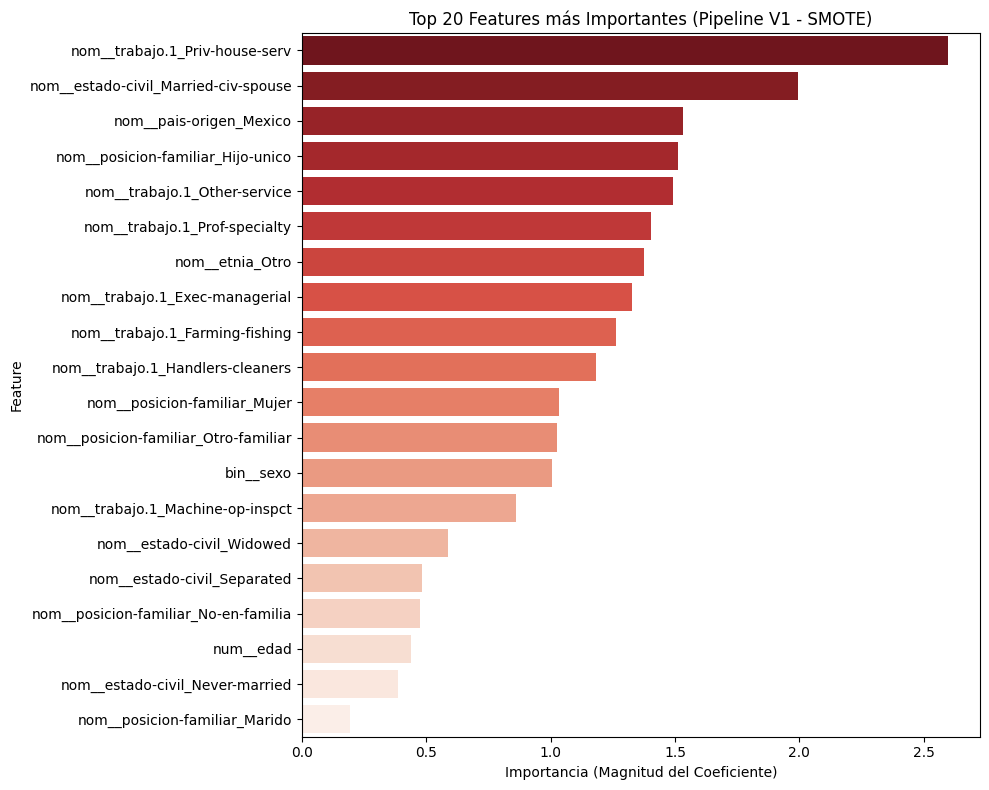

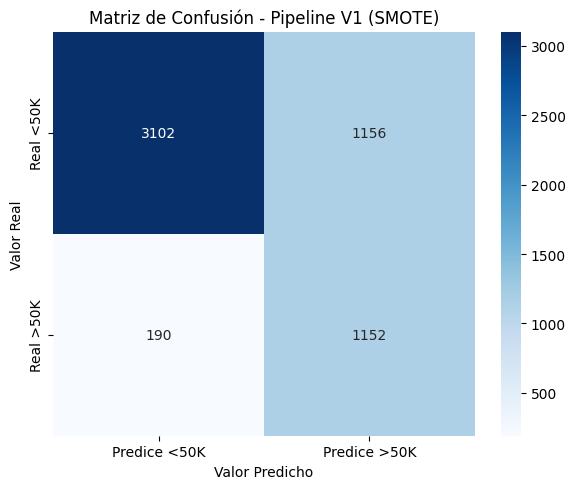

In [97]:
model_juez_v1_plot = LogisticRegression(solver='liblinear', random_state=32)
X_train_c2_v1 = X_train_balanced[:, features_consenso_2]
final_feature_names_v1 = preprocessor.get_feature_names_out()[features_consenso_2]

model_juez_v1_plot.fit(X_train_c2_v1, y_train_balanced)

importance_v1 = pd.Series(
    np.abs(model_juez_v1_plot.coef_[0]), 
    index=final_feature_names_v1
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
# CORREGIDO: Añadido hue y legend=False
sns.barplot(x=importance_v1.head(20).values, y=importance_v1.head(20).index, 
            hue=importance_v1.head(20).index, palette="Reds_r", legend=False)
plt.title('Top 20 Features más Importantes (Pipeline V1 - SMOTE)')
plt.xlabel('Importancia (Magnitud del Coeficiente)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_v1.png')

X_val_c2_v1 = X_val_preprocessed[:, features_consenso_2]
preds_c2_v1_plot = model_juez_v1_plot.predict(X_val_c2_v1)

cm_v1 = confusion_matrix(y_val, preds_c2_v1_plot)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=true_labels)
plt.title('Matriz de Confusión - Pipeline V1 (SMOTE)')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.savefig('confusion_matrix_v1.png')

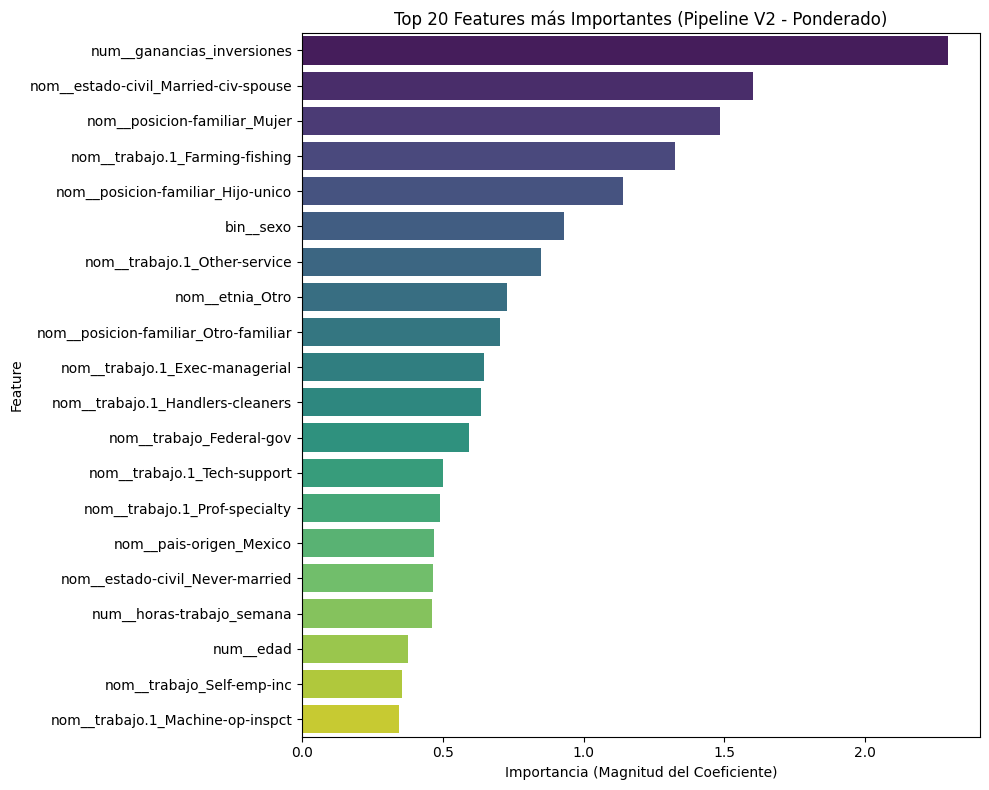

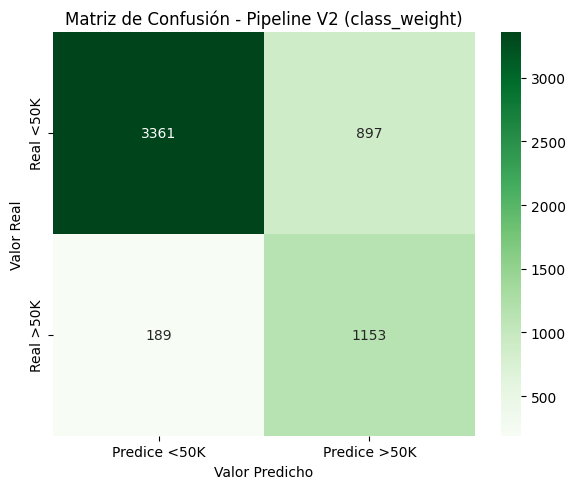

In [98]:
model_juez_v2_plot = LogisticRegression(solver='liblinear', random_state=32, class_weight='balanced')
X_train_c2_v2 = X_train_preprocessed_v2[:, features_consenso_2_v2]
final_feature_names_v2 = preprocessor_v2.get_feature_names_out()[features_consenso_2_v2]

model_juez_v2_plot.fit(X_train_c2_v2, y_train)

importance_v2 = pd.Series(
    np.abs(model_juez_v2_plot.coef_[0]), 
    index=final_feature_names_v2
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance_v2.head(20).values, y=importance_v2.head(20).index, 
            hue=importance_v2.head(20).index, palette="viridis", legend=False)
plt.title('Top 20 Features más Importantes (Pipeline V2 - Ponderado)')
plt.xlabel('Importancia (Magnitud del Coeficiente)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_v2.png')

X_val_c2_v2 = X_val_preprocessed_v2[:, features_consenso_2_v2]
preds_c2_v2_plot = model_juez_v2_plot.predict(X_val_c2_v2)

cm_v2 = confusion_matrix(y_val, preds_c2_v2_plot)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=true_labels)
plt.title('Matriz de Confusión - Pipeline V2 (class_weight)')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.savefig('confusion_matrix_v2.png')